In [1]:
# Code from BrAInlab

import mne
from pathlib import Path
import matplotlib as plt

path = Path('eeg_data/20240328164103_notch_laurids_Cross.edf')
print(path)
# datafile = Path('/Volumes/EEGTRANSFER/melodies-recon/EEG/day1/ses-flute/eeg/sub-aaa_ses-flute_task-Default_run-001_eeg.xdf')
data = mne.io.read_raw_edf(path)
raw_data = data.get_data()
info = data.info
channels = data.ch_names
streams=data


print(raw_data)
print(info)
print(channels)



eeg_data/20240328164103_notch_laurids_Cross.edf
Extracting EDF parameters from /Users/lauridspedersen/git/electroencephalogaming/src/electroencephalogaming/eeg_data/20240328164103_notch_laurids_Cross.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
[[-9.69924702e-05 -1.10598661e-04 -1.06025610e-04 ... -8.25635444e-05
  -9.41947949e-05 -9.40855989e-05]
 [-8.70272623e-05 -9.25693865e-05 -8.67585281e-05 ... -1.09644339e-04
  -1.19624710e-04 -1.22340992e-04]
 [-9.45504891e-05 -1.09695799e-04 -1.03442538e-04 ... -7.41429556e-05
  -8.12490894e-05 -8.43364879e-05]
 ...
 [-2.15152209e-06 -2.15152209e-06 -2.15152209e-06 ... -1.47005585e-01
  -1.47005585e-01 -1.47005585e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -9.90391968e+00
  -9.90391968e+00 -9.90391968e+00]
 [ 1.76699474e-05  1.76699474e-05  1.76699474e-05 ...  1.37199095e+00
   1.37199095e+00  1.37199095e+00]]
<Info | 8 non-empty values
 bads: []
 ch_names: C1, C2, C3, C4, FC1, Cz, F

In [2]:
sfreq = info["sfreq"]

In [3]:
X = raw_data

# chs = chs[:16]

info = mne.create_info(channels, sfreq, ch_types='eeg')
raw = mne.io.RawArray(X, info)

#raw = raw.set_eeg_reference(ref_channels=['1', '2'])


Creating RawArray with float64 data, n_channels=11, n_times=31500
    Range : 0 ... 31499 =      0.000 ...    62.998 secs
Ready.


In [4]:
raw.get_data().mean()

-0.7558232392984854

In [18]:
raw.get_data().mean(axis=1)

array([-9.56248693e-05, -9.40627085e-05, -9.25871374e-05, -9.56422452e-05,
       -9.55084794e-05, -1.14247797e-04, -5.34210293e-05, -1.62468172e-04,
       -1.09819703e-01, -9.78581564e+00,  1.58238327e+00])

Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


/Users/lauridspedersen/opt/anaconda3/envs/eeg/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/Users/lauridspedersen/opt/anaconda3/envs/eeg/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


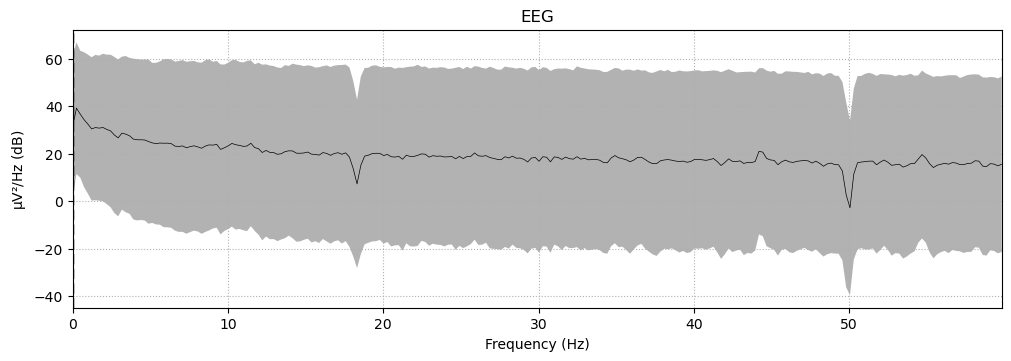

In [6]:
raw_notch = raw.copy().notch_filter(freqs=[18.3, 50], verbose=False)
for title, data in zip(["Un", "Notch "], [raw, raw_notch]):
    fig = data.compute_psd(fmax=60).plot(average=True, picks="data", exclude="bads")
    
fig

In [17]:
raw_notch.copy().filter(1,60, verbose=False).plot(n_channels=len(channels), scalings='auto', title='Auto-scaled Data from notch filter arrays')

Using pyopengl with version 3.1.1a1


Channels marked as bad:
none


In [11]:
raw.copy().filter(1,60).plot(n_channels=len(channels), scalings='auto',title='Auto-scaled Data from [1;60] filtered arrays')

Using pyopengl with version 3.1.1a1


Channels marked as bad:
none


In [13]:
raw.copy().plot(n_channels=len(channels), scalings='auto',title='Auto-scaled Data from arrays')

Using pyopengl with version 3.1.1a1
